In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
BankFull = pd.read_csv("bank-full.csv")  
BankFull.shape

(45211, 17)

In [3]:
BankFull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
BankFull.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# #Attribute information##
#Input variables:##

*Bank client data:
#1.age:Continuous feature 
#2.job:Type of job (management, technician, entrepreneur, blue-collar, etc.)
#3.marital: marital status(married, single, divorced)
#4.education:education level (primary, secondary, tertiary)
#5.default: has credit in default? 
#6.housing: has housing loan? 
#7.loan: has personal loan?
#8.balance in account

*Related to previous contact:
#9.contact: contact communication type
#10.month: last contact month of year
#11.day: last contact day of the month
#12.duration: last contact duration, in seconds

*Other attributes:
#13.campaign: number of contacts performed during this campaign and for this client
#14.pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
#15.previous: number of contacts performed before this campaign and for this client
#16.poutcome: outcome of the previous marketing campaignOutput variable (desired target):
#17.Target: Tell us has the client subscribed a term deposit. (Yes, No)
The meaning of this terminlogy in banking is: Your money is invested for an agreed rate of interest over a fixed amount of time,


## Data type ##

In [5]:
BankFull.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


From above:
#We do not have any missing values 45211 in each feature

#we see also that the variabes Age, balance, day, duration, campaign,pdays, previous are numeric type integers which is acceptable.
#But we need to make sure that these numbers are contineous (not close to discrete)

#However, job ,marital, education ,default housing, loan, contact, month, poutcome, Target are of object type: 
#1) we need to convert them to a ctergorical varialve type and
#2) then decide weather we give them a sense of leveling or creat dummies after investigating the ranges of their values

In [6]:
BankFull.columns
for col in BankFull.columns:
    print(col,': number of unique entries = ',BankFull[col].nunique())

age : number of unique entries =  77
job : number of unique entries =  12
marital : number of unique entries =  3
education : number of unique entries =  4
default : number of unique entries =  2
balance : number of unique entries =  7168
housing : number of unique entries =  2
loan : number of unique entries =  2
contact : number of unique entries =  3
day : number of unique entries =  31
month : number of unique entries =  12
duration : number of unique entries =  1573
campaign : number of unique entries =  48
pdays : number of unique entries =  559
previous : number of unique entries =  41
poutcome : number of unique entries =  4
Target : number of unique entries =  2


In [7]:
#print(BankFull.marital.value_counts())

In [8]:
#lets convert object to catergorical:
for feature in BankFull.columns: # Loop through all columns in the dataframe
    if BankFull[feature].dtype == 'object': # Only apply for columns with categorical strings
        BankFull[feature] = pd.Categorical(BankFull[feature])# Replace strings with an integer

In [9]:
BankFull.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# #univariate analysis##

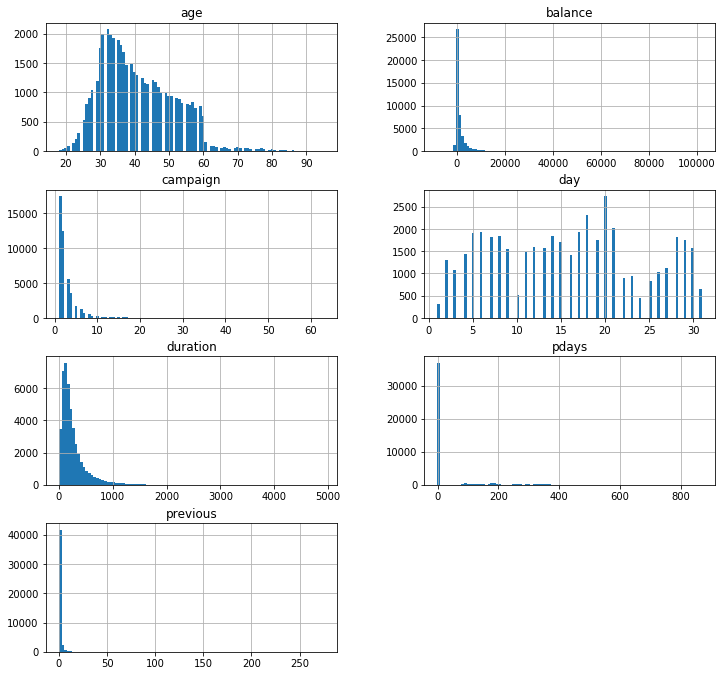

In [10]:
##the numeric variables##
#First: The histograms#
col=BankFull.columns
BankFull[col].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,2));

In [11]:
#sns.distplot(BankFull['duration'], kde=False, rug=True);

In [12]:
#Second: The statistical moments of numeric variables#
Describe=BankFull.describe()
DescribeT=Describe.T
#DescribeT

In [13]:
#DescribeT['mean']

In [14]:
#BankFull.columns
Intg_col =['age','balance','day', 'duration', 'campaign', 'pdays',
       'previous']
#print(BankFull[Intg_col].median())
DescribeT['median'] = BankFull[Intg_col].median()

In [15]:
DescribeT

,count,mean,std,min,25%,50%,75%,max,median
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0,39.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0,448.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0,16.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0,180.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0,2.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0,-1.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0,0.0


#The histograms and the DescribeT dataframe above shows that:
#Age:
#1)The age of the trageted customers is mainly in the range between 25 years and 60 years
75% of them are below 48 years
#2) The median and the mean 39 and 40.9 respectively, vercy close to normal distribution
We might consider ages > 48 as outliers as needed

#balance
#Does negative balance make sense? I think yes because from its definition:
#A negative balance in the checking account means the client owes money to the bank
#or the client has used more than what she/he had in their account.
#the maxium is 102127 which is a resonable number
#the median is 448 and the mean is 1362,
#we might consider balnce > 1428 as ouliers as needed

In [16]:
print(BankFull.balance.value_counts())

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64


In [17]:
BankFull[BankFull['balance']<0.0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


#day 
#the number of last day in which the client has been contacted in the month
#looks normal histogram distribution and the median and the mean are almost equal 

#duration
#50% of the calls took less than 180 seconds and 75% took less than 319 seconds
#the maximum duration of last contact call is 4918 seconds which means 81 minutes (not sure if this is normal)
#we migh consider any duration > 319 seconds as outliers

#Campaign
#the number of calls performed to the client through this campaign
#the median is 2 and the mean 2.7 are very close
#the min number of calls is 1 while the max is 63 calls

#pdays
#number of days that passed by after the client was last contacted from a previous campaign
#what does negative pdays mean? it is written in the attributes description above that
#(-1 tells us the person has not been contacted or contact period is beyond 900 days)
#the mean is 40 and the median is -1. very far, not normal distribution

In [18]:
print(BankFull.pdays.value_counts())

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64


In [19]:
36957.0*100/(45211.0)

81.74338103558868

#82 % of the trageted clients have not been contacted from the time of the previous campaign

In [20]:
#BankFull[BankFull['pdays']==-1.0]

#previous 
#number of contacts performed before this campaign
#the median is 0 and the mean is 0.5 while the max is 275 (looks like this is an outlier)

In [21]:
print(BankFull.previous.value_counts())

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64


In [22]:
36954.0*100/(45211.0)

81.73674548229413

#Again: 82 % of the trageted clients have not been contacted before this campaign starts

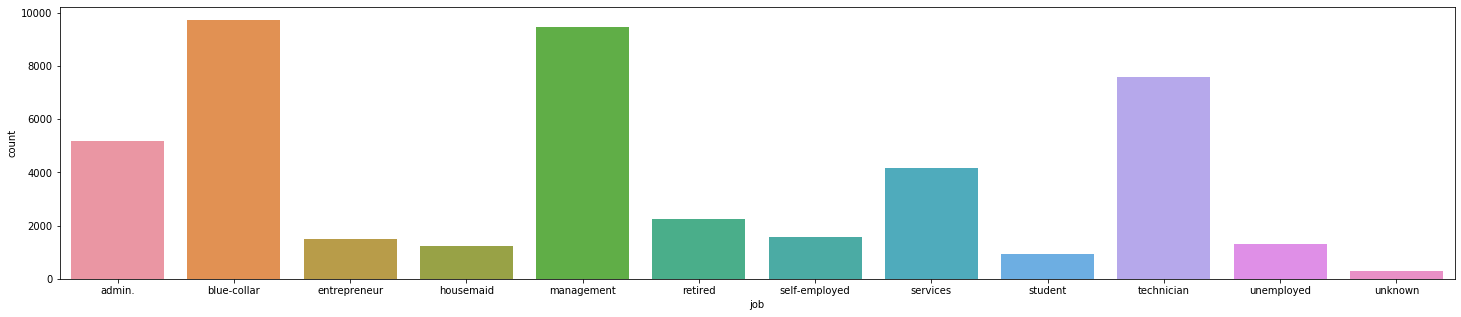

In [23]:
##the categorical variables##
##The count plots##
plt.figure(figsize=(25, 5))
sns.countplot(BankFull['job'])
plt.show()

#the majority of the jobs of the targeted clients are blue-collar, managment and technicians
#then comes the admin and the services and retired
#selfemployed, enterpreneurs, housemail, unemplolyed and students are the among the minority group
#the unknowns are very small group in the targeted clients

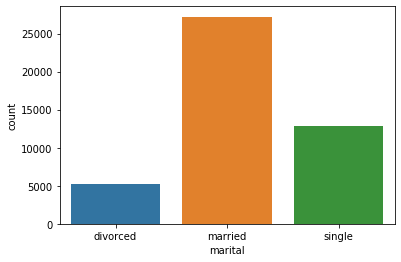

In [24]:
sns.countplot(BankFull['marital'])
plt.show()

#the majority of the status of the clients are married around 60% of the total population, while 35% are single, and around 15% are divorced.

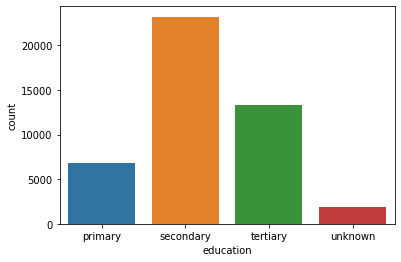

In [25]:
sns.countplot(BankFull['education'])
plt.show()

#50% of the clients have secondary eduaction
#30% of them have tertiary level
#15% have primary eduaction 
while 5% are of unknown education

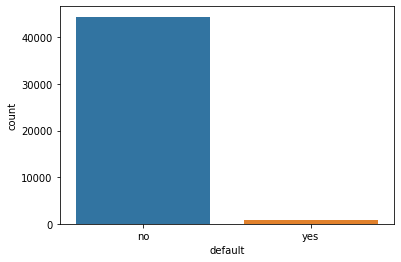

In [26]:
sns.countplot(BankFull['default'])
plt.show()

#A default on credit is when you fail to pay an expected debt, such as utility charges, mobile phone bills, credit card repayments or loans.
#more than 95% of the clients do not have credit in default while less than 5% do have credit in default.

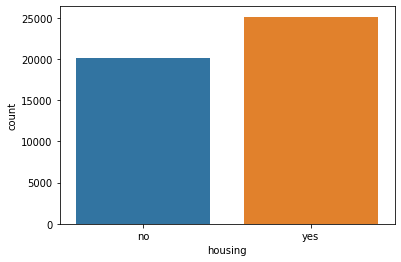

In [27]:
sns.countplot(BankFull['housing'])
plt.show()

#around 55% of the clients have housing while around 44% do not have housing

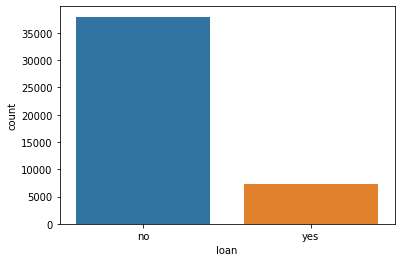

In [28]:
sns.countplot(BankFull['loan'])
plt.show()

#around 83% of the clients do not have personal loan while the rest do

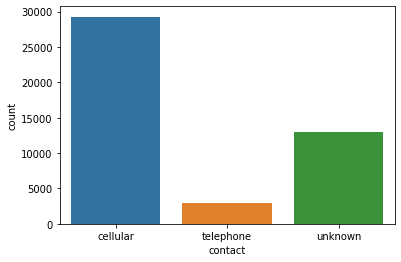

In [29]:
sns.countplot(BankFull['contact'])
plt.show()

#aroud 65% of the clients have cellualr contact type,around 5% have telephone, while around 30 % their contact type in unknown 

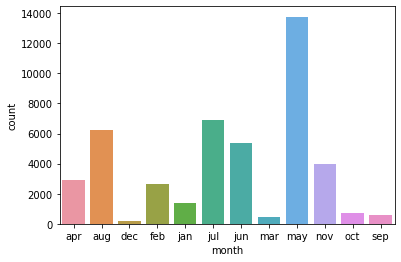

In [30]:
sns.countplot(BankFull['month'])
plt.show()

#Most of the contacts have taken place in May
#Then comes July and Augest and June
#Then Nov, Feb ams April
#March, Oct and Sept are comparable
#While: December is the month with the least number of contacts

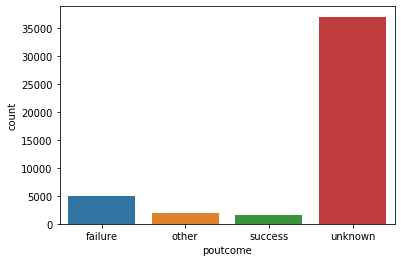

In [31]:
sns.countplot(BankFull['poutcome'])
plt.show()

#Here we see that the result of the previous campagin is mainly unknown.
#Around 80% of the results are uknown (this is a huge lack of important information)
#4% accepted the term deposit
#10% refused the term deposit
#while 6% are of other result
#i think it makes sense to group the other with the unknown

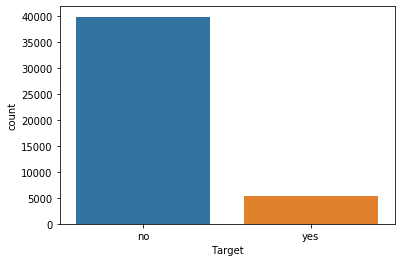

In [32]:
sns.countplot(BankFull['Target'])
plt.show()

The target (the respone of the current campaign) is highly imbalanced:
#88 % refused the term deposit
 while only 12 % responded positively

# #univariate analysis vs the target 

We show here the box plot of the numerics against the target:
The variables are: age  balance  day  duration campaign pday and previous

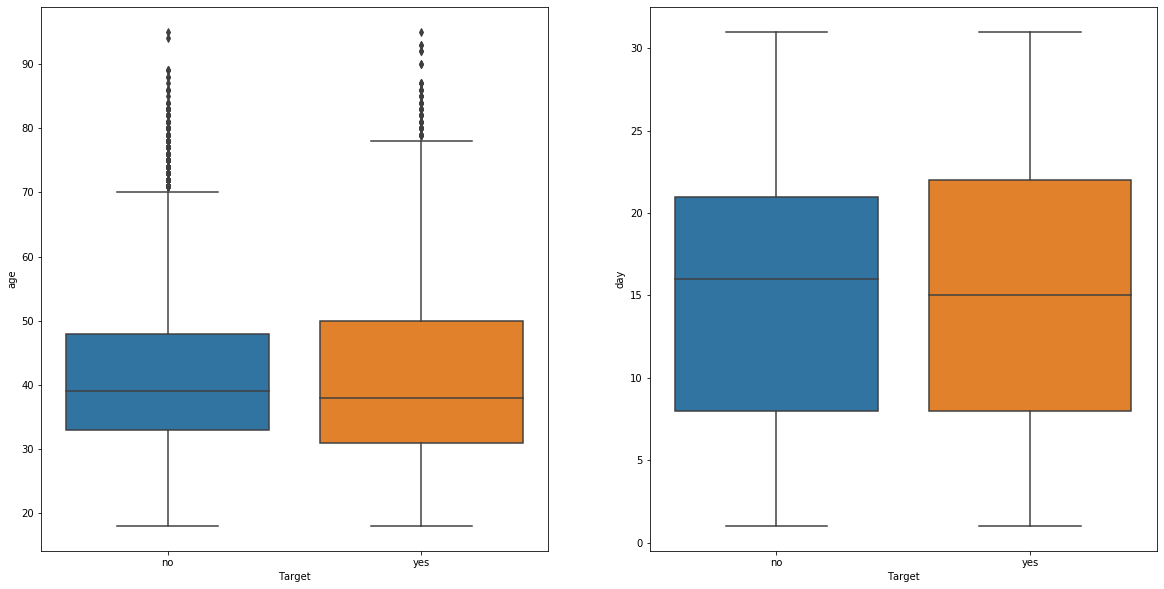

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(BankFull["Target"],BankFull["age"],data=BankFull) # 
plt.subplot(1, 2, 2)
sns.boxplot(BankFull["Target"],BankFull["day"],data=BankFull)

Here we try to make sense of how the change in one variable affect the respone: 
#The median of the age of the clients who responded to the term deposit is slightly smaller than the age of those who did not respond. This makes the age a relatively important feature.
#The median of the day number at which the contat took place is also slightly smaller in the group that responded positively to the deposit(almos exactly the mid of the month). But in general the range of the days is very similar between day 8 and day 22 or 21 for both positive and negative groups

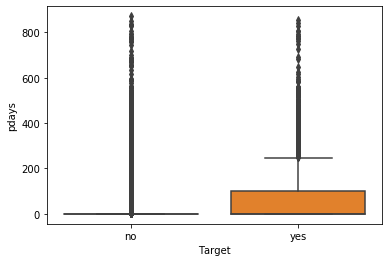

In [34]:
#plt.figure(figsize=(10,10))#plt.figure(figsize=(10,10))
sns.boxplot(BankFull["Target"],BankFull["pdays"],data=BankFull)

#Here we can see that almost all clients who refused the term deposite have not been contacted from the time of the previous campaign. No variation in the data of the pdays at all in the no group.The numer of ouliers is very large
#On the other hand, the yes group shows a greater pdays variation. 75% of the clients have been contacted within 100 days or less from the time of the previous campagin. I beleive this makes pdays a key feature.
#Note that we found above that around 82 % of the trageted clients have not been contacted from the time of the previous campaign

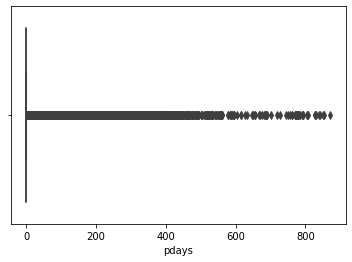

In [35]:
sns.boxplot(BankFull["pdays"])

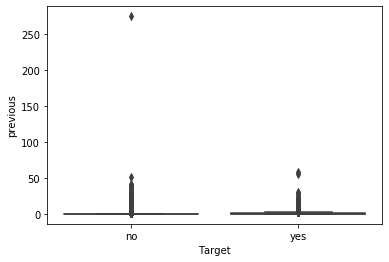

In [36]:
#plt.figure(figsize=(10,10))
sns.boxplot(BankFull["Target"],BankFull["previous"],data=BankFull) # 

#Here we examine the number of contacts made before the campagin.
#we see here that most of the people who have not accepted the term deposite have not been contacted (0 calls)
#while, it looks like the spread in the number of calls in the positive group is slightly greater
#the No group has very laege outliers as compared to the yes group.
#again note that: 82 % of the trageted clients have not been contacted before this campaign starts.
#i think this makes this feature an important one

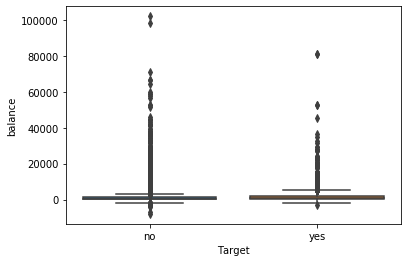

In [37]:
sns.boxplot(BankFull["Target"],BankFull["balance"],data=BankFull) # 

#the outliers in the no group are spread to greater values as compared to the yes group. 
#but the overall variation is very comparable with respect to the IQR. 
#This feature of balance amount might have relatively weaker effect on the response of clients in general

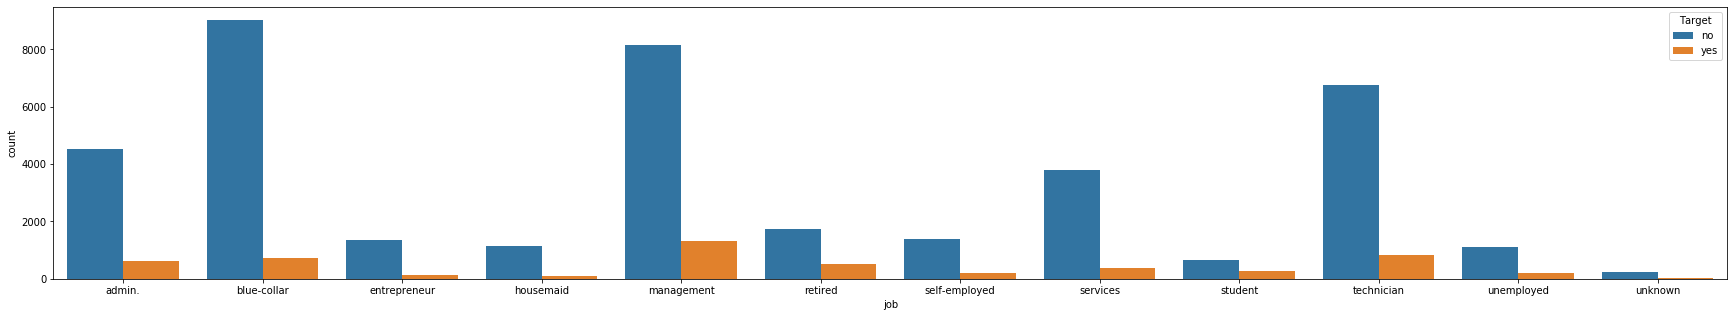

In [38]:
plt.figure(figsize=(30, 5))
sns.countplot(BankFull['job'],hue=BankFull['Target']) # after dummies this does not work do I deketed the dummies to get it
plt.show()

#The type of job does have a great effect on the response of the clients.
#the groups that responded postively the most are the mangment,then the technicians then the bluecollar, the admins and retired clients
#the groups that responed postively the least are the unemployees, the housmaids and the enterpreneurs
#students, service and selfemployeed come in the middle between the above two
#Also we note that the group with the higest denial rate to the deposit is the blue collar, then the mangment, then the technicians, the service and admins

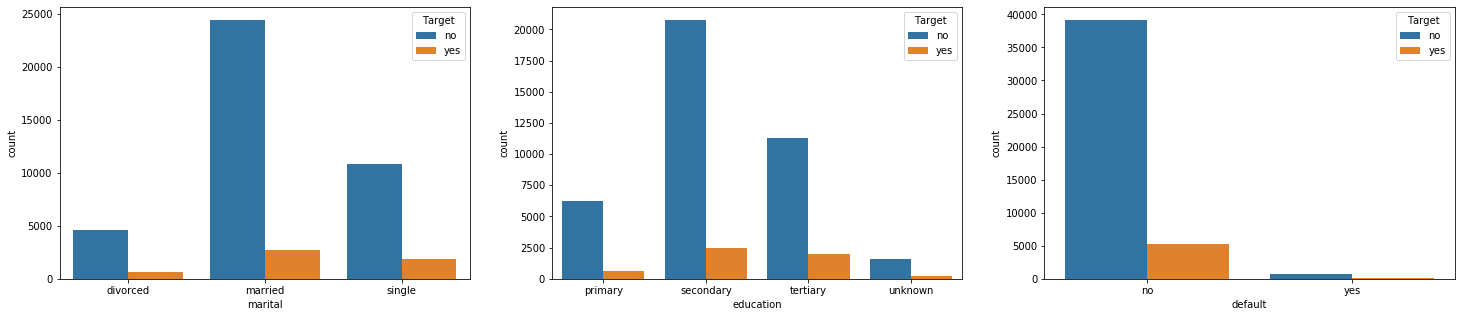

In [39]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 1)
sns.countplot(BankFull['marital'],hue=BankFull['Target']) 
plt.subplot(1, 3, 2)
sns.countplot(BankFull['education'],hue=BankFull['Target'])
plt.subplot(1, 3, 3)
sns.countplot(BankFull['default'],hue=BankFull['Target'])
plt.show()

#the marital status has a great influence on the response
#Married clients positive response is around 15% higer than the response of the singles
#divorced people shows the least positive response, around 25% of positive response married clients

#Education also is a key feature : 
The the yes group is maily from the secondary eduaction level
The teriatrey group positive response is comparble to the secondary.
The positive primary respose is almost one third of the secondary positives.

#Defult on credit also has agreat effect
#clients with no debt in default responded positively the most as compared to thoes with credit on default.
#clients with positive response to the depsite and who have default on credit is only 15 to 20 % of thoes who responded positively to the deposite and do not have default on credit



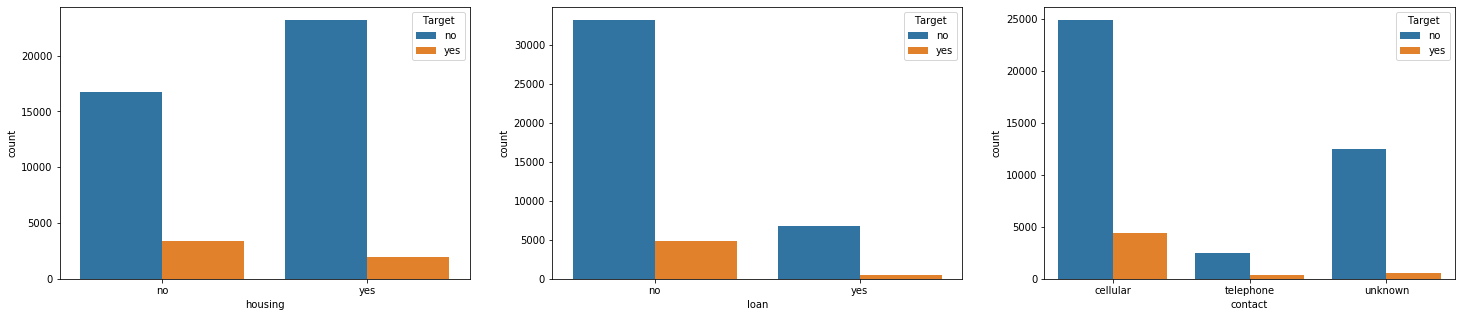

In [40]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 1)
sns.countplot(BankFull['housing'],hue=BankFull['Target']) 
plt.subplot(1, 3, 2)
sns.countplot(BankFull['loan'],hue=BankFull['Target'])
plt.subplot(1, 3, 3)
sns.countplot(BankFull['contact'],hue=BankFull['Target'])
plt.show()

#likewise, housing, personal loan and contact type has an effect on the response to the deposite
#the positive response to the deposite in the group with no housing in around 40 percent higher than the positive response of people with housing

#the positive resonse to the depsite in the group that has no personal loan is 70% higher than the positive response of the group that has personal loan

#the positive response to the deposite in the group with cellular contact is also around 70% higher than the positive response of the clients with either telephone or unknown contact type.

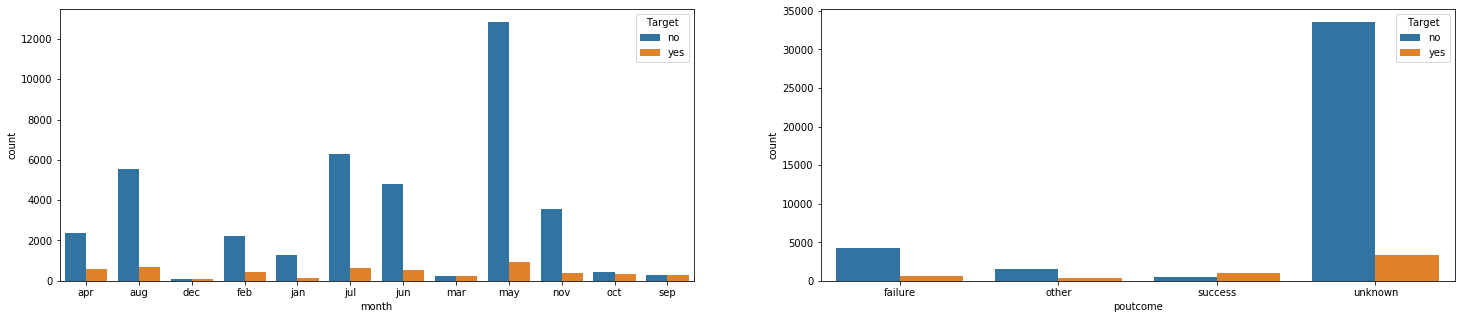

In [41]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
sns.countplot(BankFull['month'],hue=BankFull['Target']) 
plt.subplot(1, 2, 2)
sns.countplot(BankFull['poutcome'],hue=BankFull['Target'])
plt.show()

#The moth of the contact does have an effect. The highest positive respnse is between April and Auguest.
#the next high positive response is between Sept and October
#the lowest positive response is between December and March

#the result of the previous campagin has an effect too
around 20 % of the previous failure response have accepted the depsite
around two thirds of the previous sucess response have accepted the deposite
around one sixth of the previous unknown response have accepted the deposite

# # Bivariate analysis

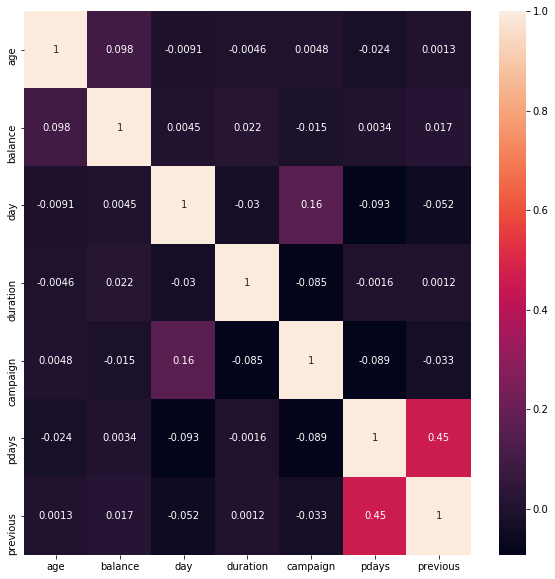

In [42]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(BankFull.corr(), annot = True, ax=ax)

#the higest positive corrolation is between the pdays and previous
#pdays number of days that passed by after the client was last contacted from a previous campaign
#previous number of contacts performed before this campaign

In [43]:
BankFull.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [44]:
replaceStruct = {
                "housing": {"no": 0, "yes":1},
                 "loan": {"no": 0, "yes":1 },
                 "contact":     {"unknown": 1, "telephone": 2 ,"cellular": 3},
                 "Target": {"no": 0, "yes":1},
                "default":     {"no": 0, "yes": 1 } 
                    }
oneHotCols=["job","marital","month","poutcome"]

In [45]:
BankFull=BankFull.replace(replaceStruct)

In [46]:
BankFull.dtypes

age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing         int64
loan            int64
contact         int64
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target          int64
dtype: object

#lets check the heat map again when we converted most of the binary variables to integers

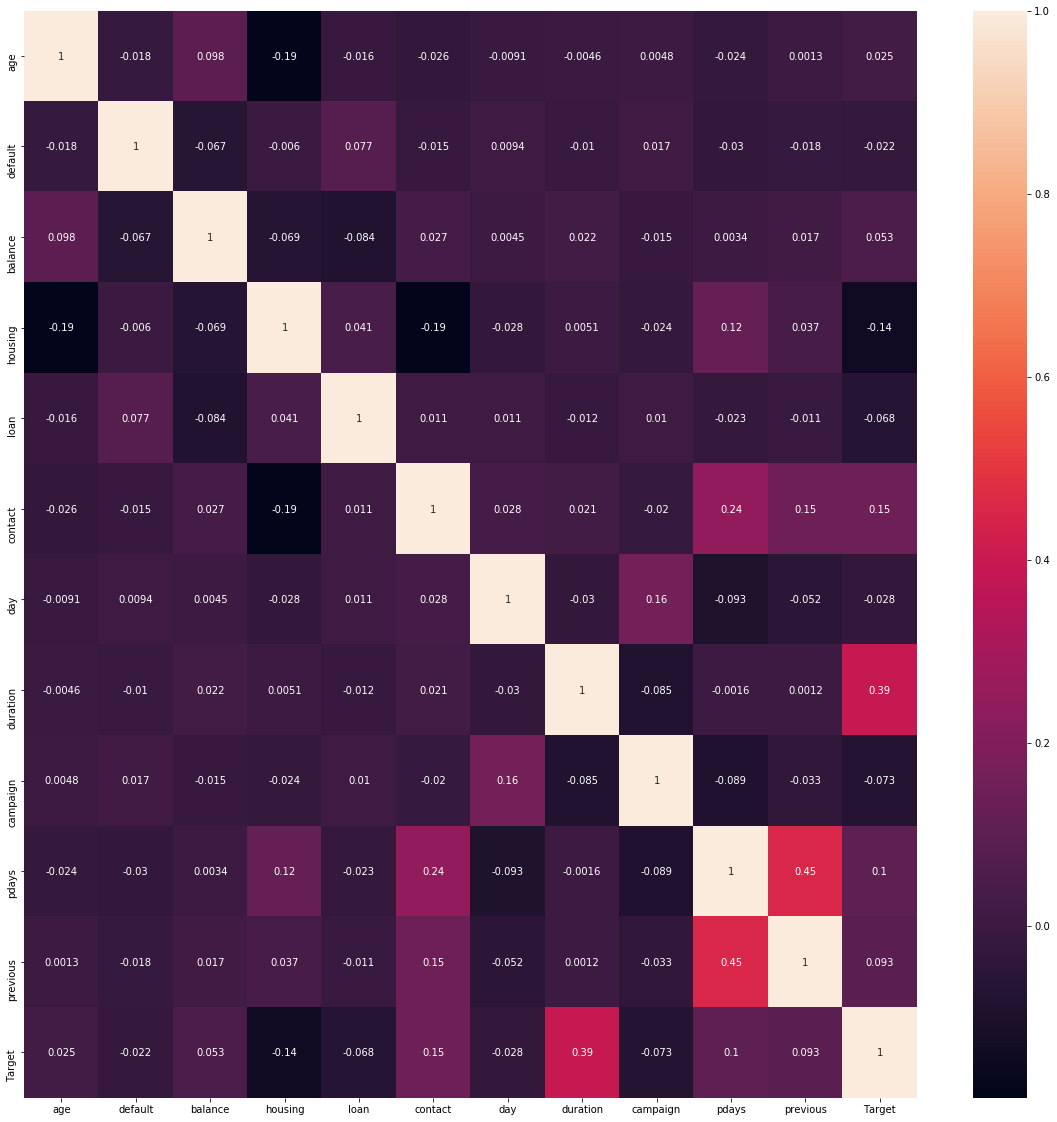

In [47]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(BankFull.corr(), annot = True, ax=ax)

#In addition to the previous note about pdays and previous
#the higest positive corrolation is between the pdays and previous 0.45 (Icould drop previous as its corrlation to the target is weaker as compared to the pdays(but not for today)
#the duration and the target shows some corrolation 0.39
#I think we can keep all variables since the corr coef. did not exceed 0.5
#but we could try later to drop and decrese the corr threshold
#also not sure if in another trail i can remove all below 0.1 corr coeffient

In [48]:
BankFull = pd.get_dummies(BankFull, columns=['education'])
  # "education":     {"unknown": 0, "primary": 1 ,"secondary": 2 ,"tertiary":3},

In [49]:
BankFull=pd.get_dummies(BankFull, columns=oneHotCols)
BankFull.head(10)

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,1,5,261,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,1,5,151,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,1,5,76,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,1,5,92,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,1,5,198,1,-1,...,0,0,1,0,0,0,0,0,0,1
5,35,0,231,1,0,1,5,139,1,-1,...,0,0,1,0,0,0,0,0,0,1
6,28,0,447,1,1,1,5,217,1,-1,...,0,0,1,0,0,0,0,0,0,1
7,42,1,2,1,0,1,5,380,1,-1,...,0,0,1,0,0,0,0,0,0,1
8,58,0,121,1,0,1,5,50,1,-1,...,0,0,1,0,0,0,0,0,0,1
9,43,0,593,1,0,1,5,55,1,-1,...,0,0,1,0,0,0,0,0,0,1


#the number of variables have increased

In [50]:
BankFull.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
contact                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
Target                 int64
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
month_apr              uint8
month_aug              uint8
month_dec              uint8
month_feb     

In [51]:
#the independent variables
X = BankFull.drop(['education_unknown','job_unknown','marital_divorced','month_dec','poutcome_unknown','Target'], axis=1)
# the dependent variable
y = BankFull[['Target']]

In [52]:
X.shape

(45211, 41)

In [53]:
y.shape

(45211, 1)

In [54]:
print(y[y['Target']==0.0].count())
print(len(y['Target']))
print((y[y['Target']==0.0].count()/len(y['Target']))*100)

Target    39922
dtype: int64
45211
Target    88.30152
dtype: float64


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#check if the created sets(test and train) have the same balance in the Target as the mother data set X and y

In [56]:
print(y_train[y_train['Target']==0.0].count())
print(len(y_train['Target']))
print((y_train[y_train['Target']==0.0].count()/len(y_train['Target']))*100)

Target    27909
dtype: int64
31647
Target    88.188454
dtype: float64


In [57]:
print(y_test[y_test['Target']==0.0].count())
print(len(y_test['Target']))
print((y_test[y_test['Target']==0.0].count()/len(y_test['Target']))*100)

Target    12013
dtype: int64
13564
Target    88.56532
dtype: float64


# #Logistic Regression

In [58]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on training data
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on testing data
y_predict_logit = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

C:\Users\hassa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


          0         1         2         3         4         5         6  \
0 -0.011157 -0.251373  0.000018 -0.704076 -0.351882  0.586169  0.001715   

          7         8         9  ...       32        33        34        35  \
0  0.004147 -0.091967  0.000208  ... -0.02554  1.329202 -0.776495 -1.084906   

        36        37        38        39        40  intercept  
0  0.90492  0.691743  0.087744  0.044143  2.068179  -2.640977  

[1 rows x 42 columns]


In [59]:
model_score = model.score(X_test, y_test)
print('Testing accuracy',model_score)

Testing accuracy 0.901061633736361


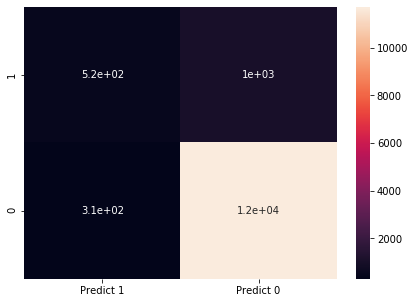

In [60]:
cm=metrics.confusion_matrix(y_test, y_predict_logit, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [61]:
print("Trainig accuracy of logit regression",model.score(X_train,y_train))  
print()
print("Testing accuracy of logit regression",model.score(X_test, y_test))
print()
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
print("Recall of logit regression:",recall_score(y_test,y_predict_logit))
print()
print("Precision of logit regression:",precision_score(y_test,y_predict_logit))
print()
print("F1 Score of logit regression:",f1_score(y_test,y_predict_logit))
print()
print("Roc Auc Score of logit regression:",roc_auc_score(y_test,y_predict_logit))

Trainig accuracy of logit regression 0.90153885044396

Testing accuracy of logit regression 0.901061633736361

Recall of logit regression: 0.3339780786589297

Precision of logit regression: 0.626360338573156

F1 Score of logit regression: 0.43566021867115223

Roc Auc Score of logit regression: 0.6541279721522402


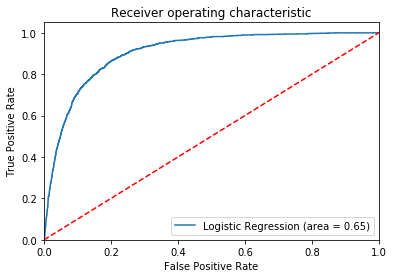

In [62]:
#Area under the curve (AUC) and ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# # Decision Tree##

In [63]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree

In [64]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
#predict on testing data
y_predict_dTree = dTree.predict(X_test)

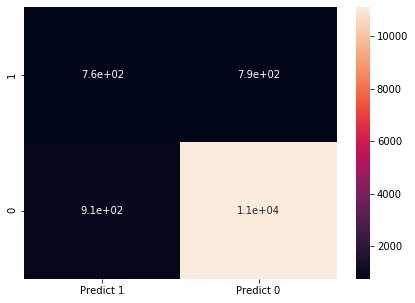

In [65]:
cd=metrics.confusion_matrix(y_test, y_predict_dTree, labels=[1, 0])

df_cd = pd.DataFrame(cd, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cd, annot=True)

In [66]:
print("Trainig accuracy of dTree",dTree.score(X_train,y_train))  
print()
print("Testing accuracy of dTree",dTree.score(X_test, y_test))
print()
print("Recall of dTree:",recall_score(y_test,y_predict_dTree))
print()
print("Precision of dTree:",precision_score(y_test,y_predict_dTree))
print()
print("F1 Score of dTree:",f1_score(y_test,y_predict_dTree))
print()
print("Roc Auc Score of dTree:",roc_auc_score(y_test,y_predict_dTree))

Trainig accuracy of dTree 1.0

Testing accuracy of dTree 0.874447065762312

Recall of dTree: 0.49000644745325594

Precision of dTree: 0.45454545454545453

F1 Score of dTree: 0.47161030096183676

Roc Auc Score of dTree: 0.7070443458443337


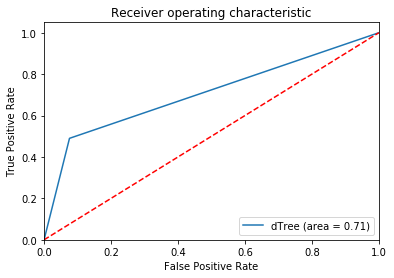

In [67]:
#Area under the curve (AUC) and ROC curve
dTree_roc_auc = roc_auc_score(y_test, dTree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dTree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='dTree (area = %0.2f)' % dTree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Regularized Decision Tree

In [68]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
y_predict_dTreeR = dTreeR.predict(X_test)
print("Trainig accuracy of dTreeR",dTreeR.score(X_train,y_train))  
print()
print("Testing accuracy of dTreeR",dTreeR.score(X_test, y_test))
print()
print("Recall of dTreeR:",recall_score(y_test,y_predict_dTreeR))
print()
print("Precision of dTreeR:",precision_score(y_test,y_predict_dTreeR))
print()
print("F1 Score of dTreeR:",f1_score(y_test,y_predict_dTreeR))
print()
print("Roc Auc Score of dTreeR:",roc_auc_score(y_test,y_predict_dTreeR))

Trainig accuracy of dTreeR 0.9005276961481341

Testing accuracy of dTreeR 0.9019463285166618

Recall of dTreeR: 0.3127014829142489

Precision of dTreeR: 0.6475300400534045

F1 Score of dTreeR: 0.4217391304347826

Roc Auc Score of dTreeR: 0.6453626452280393


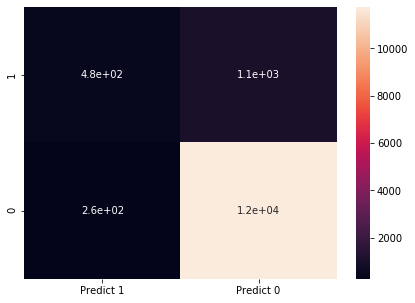

In [69]:
cdR=metrics.confusion_matrix(y_test, y_predict_dTreeR, labels=[1, 0])

df_cdR = pd.DataFrame(cdR, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cdR, annot=True)

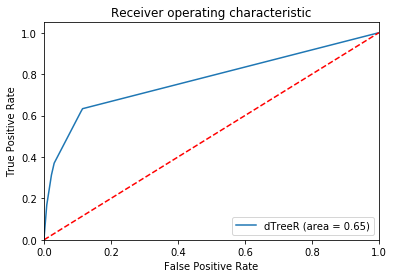

In [70]:
#Area under the curve (AUC) and ROC curve
dTreeR_roc_auc = roc_auc_score(y_test, dTreeR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dTreeR.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='dTreeR (area = %0.2f)' % dTreeR_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# #Ensembles : Bagging

In [71]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)
y_predict_bgcl = bgcl.predict(X_test)
print("Trainig accuracy of Bagging",bgcl.score(X_train,y_train))  
print()
print("Testing accuracy of Bagging",bgcl.score(X_test, y_test))
print()
print("Recall of Bagging:",recall_score(y_test,y_predict_bgcl))
print()
print("Precision of Bagging:",precision_score(y_test,y_predict_bgcl))
print()
print("F1 Score of Bagging:",f1_score(y_test,y_predict_bgcl))
print()
print("Roc Auc Score of Bagging:",roc_auc_score(y_test,y_predict_bgcl))

C:\Users\hassa\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig accuracy of Bagging 0.999715612854299

Testing accuracy of Bagging 0.9074756708935418

Recall of Bagging: 0.501611863313991

Precision of Bagging: 0.6174603174603175

F1 Score of Bagging: 0.5535396655994308

Roc Auc Score of Bagging: 0.7307443317235899


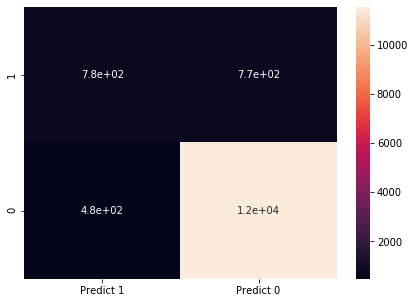

In [72]:
cbgcl=metrics.confusion_matrix(y_test, y_predict_bgcl, labels=[1, 0])

df_cbgcl = pd.DataFrame(cbgcl, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cbgcl, annot=True)

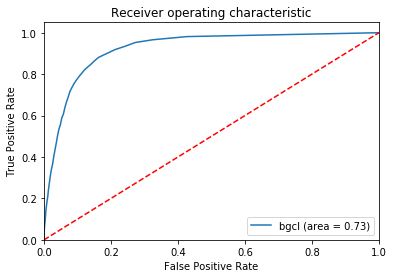

In [73]:
#Area under the curve (AUC) and ROC curve
bgcl_roc_auc = roc_auc_score(y_test, bgcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bgcl.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='bgcl (area = %0.2f)' % bgcl_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# #Ensemble AdaBoosting

In [74]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)
y_predict_abcl = abcl.predict(X_test)
print("Trainig accuracy of AdaBoosting",abcl.score(X_train,y_train))  
print()
print("Testing accuracy of AdaBoosting",abcl.score(X_test, y_test))
print()
print("Recall of AdaBoosting:",recall_score(y_test,y_predict_abcl))
print()
print("Precision of AdaBoosting:",precision_score(y_test,y_predict_abcl))
print()
print("F1 Score of AdaBoosting:",f1_score(y_test,y_predict_abcl))
print()
print("Roc Auc Score of AdaBoosting:",roc_auc_score(y_test,y_predict_abcl))

C:\Users\hassa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig accuracy of AdaBoosting 0.8950927418080703

Testing accuracy of AdaBoosting 0.8948687702742554

Recall of AdaBoosting: 0.34493874919406836

Precision of AdaBoosting: 0.5661375661375662

F1 Score of AdaBoosting: 0.4286858974358974

Roc Auc Score of AdaBoosting: 0.655404528180652


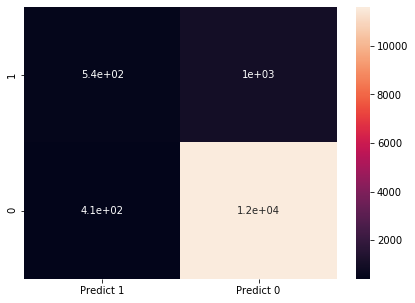

In [75]:
cabcl=metrics.confusion_matrix(y_test, y_predict_abcl, labels=[1, 0])

df_cabcl = pd.DataFrame(cabcl, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cabcl, annot=True)

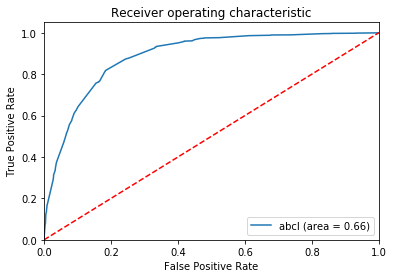

In [76]:
#Area under the curve (AUC) and ROC curve
abcl_roc_auc = roc_auc_score(y_test, abcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, abcl.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='abcl (area = %0.2f)' % abcl_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# #Ensemble: GradientBoost

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_predict_gbcl = gbcl.predict(X_test)
print("Trainig accuracy of GradientBoost",gbcl.score(X_train,y_train))  
print()
print("Testing accuracy of GradientBoost",gbcl.score(X_test, y_test))
print()
print("Recall of GradientBoost:",recall_score(y_test,y_predict_gbcl))
print()
print("Precision of GradientBoost:",precision_score(y_test,y_predict_gbcl))
print()
print("F1 Score of GradientBoost:",f1_score(y_test,y_predict_gbcl))
print()
print("Roc Auc Score of GradientBoost:",roc_auc_score(y_test,y_predict_gbcl))

C:\Users\hassa\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig accuracy of GradientBoost 0.9075109805036813

Testing accuracy of GradientBoost 0.90555883220289

Recall of GradientBoost: 0.3662153449387492

Precision of GradientBoost: 0.6558891454965358

F1 Score of GradientBoost: 0.47000413736036406

Roc Auc Score of GradientBoost: 0.6707044426350284


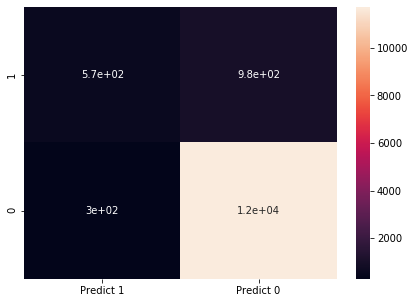

In [78]:
cgbcl=metrics.confusion_matrix(y_test, y_predict_gbcl, labels=[1, 0])

df_cgbcl = pd.DataFrame(cgbcl, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cgbcl, annot=True)

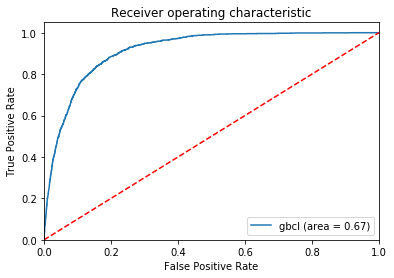

In [79]:
#Area under the curve (AUC) and ROC curve
gbcl_roc_auc = roc_auc_score(y_test, gbcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbcl.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='gbcl (area = %0.2f)' % gbcl_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# #Ensemble RandomForest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)
y_predict_rfcl = rfcl.predict(X_test)
print("Trainig accuracy of RandomForest",rfcl.score(X_train,y_train))  
print()
print("Testing accuracy of  RandomForest",rfcl.score(X_test, y_test))
print()
print("Recall of  RandomForest:",recall_score(y_test,y_predict_rfcl))
print()
print("Precision of  RandomForest:",precision_score(y_test,y_predict_rfcl))
print()
print("F1 Score of  RandomForest:",f1_score(y_test,y_predict_rfcl))
print()
print("Roc Auc Score of  RandomForest:",roc_auc_score(y_test,y_predict_rfcl))

C:\Users\hassa\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Trainig accuracy of RandomForest 0.9998420071412772

Testing accuracy of  RandomForest 0.9060749041580655

Recall of  RandomForest: 0.4480980012894907

Precision of  RandomForest: 0.6244384546271339

F1 Score of  RandomForest: 0.5217717717717718

Roc Auc Score of  RandomForest: 0.7066511816153606


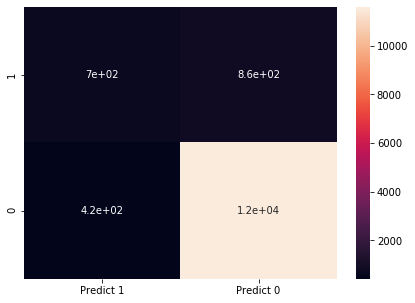

In [81]:
crfcl=metrics.confusion_matrix(y_test, y_predict_rfcl, labels=[1, 0])

df_crfcl = pd.DataFrame(crfcl, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_crfcl, annot=True)

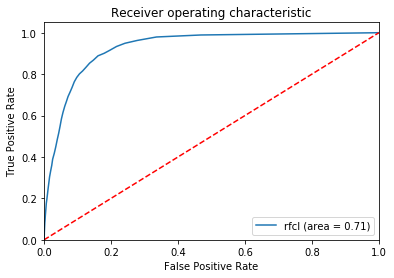

In [82]:
#Area under the curve (AUC) and ROC curve
rfcl_roc_auc = roc_auc_score(y_test, rfcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfcl.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='rfcl (area = %0.2f)' % rfcl_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [83]:
Performance = pd.DataFrame()
Performance["Algorithem"]=['Logit','DTree','DTreeR','Bagging','AdaBoosting','GradientBoost','RandomForest']
Performance["Accuracy_Training"]= [0.9,1.0,0.9,0.99,0.89,0.91,0.99]
Performance["Accuracy_Testing"]= [0.9,0.87,0.9,0.9,0.89,0.91,0.91]
Performance["Recall"]= [0.33,0.49,0.31,0.5,0.34,0.37,0.45]
Performance["precision"]= [0.63,0.45,0.65,0.62,0.57,0.66,0.62]
Performance["F1"]= [0.44,0.47,0.42,0.55,0.43,0.47,0.52]
Performance["ROC_AUC"]= [0.65,0.71,0.65,0.73,0.66,0.67,0.71]
Performance

,Algorithem,Accuracy_Training,Accuracy_Testing,Recall,precision,F1,ROC_AUC
0,Logit,0.90,0.90,0.33,0.63,0.44,0.65
1,DTree,1.00,0.87,0.49,0.45,0.47,0.71
2,DTreeR,0.90,0.90,0.31,0.65,0.42,0.65
3,Bagging,0.99,0.90,0.50,0.62,0.55,0.73
4,AdaBoosting,0.89,0.89,0.34,0.57,0.43,0.66
5,GradientBoost,0.91,0.91,0.37,0.66,0.47,0.67
6,RandomForest,0.99,0.91,0.45,0.62,0.52,0.71


#Here in this problem, that is highly imbalanced as we saw above in the Target count plot, 88%  responded negatively to the term deposit, so identifying the True negatives would be very accurate which will increase the accuracy measure. However, the false positives is the most important performance measure for two reasons here:
#1)FP are less likely to be recogized as their  occurance is much less
#2)In general the bank does not need to get this number wrong in the future plans
#For these reasons the AUC is the important measure. The Bagging and the RandomForest algorithems gave the best AUC performances (0.73,0.71) respectively.
#I also think that the precision is an important measure. Random forest and Bagging also have simultaneously the highest precision and AUC scores. The regularized decision tree although gives a high AUC score, it is overfitting the training data and gives low precision.

#As a side note logit regression might be imporoved by replacing outliers 
#and / or dropping corollated variables or makingtransformations of some variables